## Observations and Insights 

Observations
- Sex of mouse does not affect treatment.  The treatments have been distributed evenly between male and female mice.
- Weight is a factor in tumor volume and treatment time.  The larger the mouse, the larger the tumor is and the longer it takes for the tumor to reduce in size.
- Capomulin and Ramicane are the most effective treatments reducing tumor size at a faster rate.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
len(merged_df["Mouse ID"].unique())


249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

dup_mouse_id = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', "Timepoint"]), 'Mouse ID'].unique()
dup_mouse_id

# Show duplicated data for Mouse ID found in above equation

dup_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]

print("Duplicate ID:")
print(dup_mouse_id)
dup_mouse_data

Duplicate ID:
['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
clean_df = merged_df[merged_df['Mouse ID'].isin(dup_mouse_id)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

mean= clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median= clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
variance= clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
standard_dev= clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem= clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

summary_table= pd.DataFrame({"Mean Tumor Vol.": mean,
                            "Median Tumor Vol.": median,
                            "Tumor Vol. Variance": variance,
                            "Tumor Vol. Standard Dev.": standard_dev,
                            "Tumor Vol. Standard Err.": sem})
summary_table



,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Standard Dev.,Tumor Vol. Standard Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
#calculate each statistic on a single line using .agg.

summary_table2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

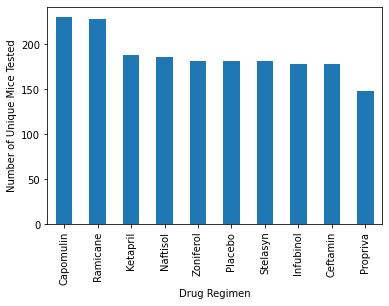

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

bar_counts = clean_df["Drug Regimen"].value_counts()
bar_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation=90)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

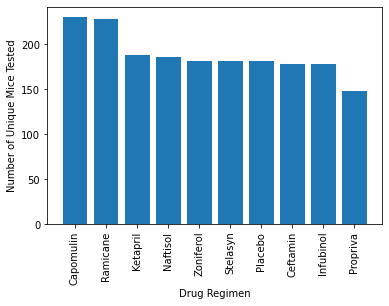

In [10]:
# General identical bar plot using pyplot instead of pandas.
bar_counts = clean_df["Drug Regimen"].value_counts()
plt.bar(bar_counts.index.values, bar_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation=90)
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

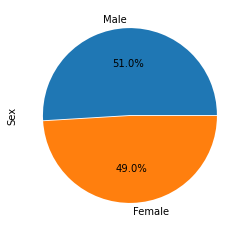

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_counts= clean_df["Sex"].value_counts()
explode = (0, 0.01)
pie_counts.plot(kind="pie", explode=explode, autopct='%1.1f%%')
plt.show



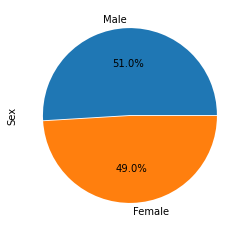

In [12]:
# Generate identical pie plot using pyplot
pie_counts= clean_df["Sex"].value_counts()
explode = (0, 0.01)
plt.pie(pie_counts.values, explode=explode, labels=pie_counts.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse#

max_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()

max_timepoint = max_timepoint.reset_index()
max_timepoint




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_df = max_timepoint.merge(clean_df, on=['Mouse ID', 'Timepoint'],how="left")
max_time_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Stelasyn", "Propriva"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# use for loop to calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_final = clean_df.loc[clean_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
 
    # add subset 
    tumor_vol_data.append(tumor_vol_final)
   
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol_final.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower
    lower_range = lower - (1.5*iqr)
    upper_range = upper + (1.5*iqr)
    outliers = tumor_vol_final.loc[(tumor_vol_final < lower_range)|(tumor_vol_final > upper_range)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Stelasyn's potential outliers: 1179    75.12369
Name: Tumor Volume (mm3), dtype: float64
Propriva's potential outliers: 1289    71.172463
1290    72.455421
Name: Tumor Volume (mm3), dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

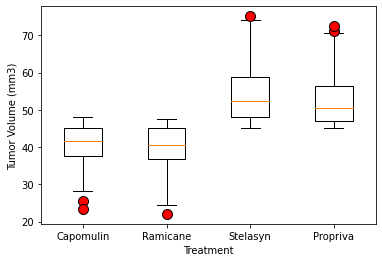

In [16]:
format_box = dict(markerfacecolor='red',markersize=10)
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=format_box)
# There should be a single chart with four box plots inside it.

plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

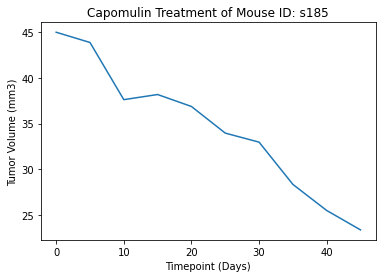

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_data

mouse_on_cap = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']
mouse_on_cap
# treated with Capomulin
plt.plot(mouse_on_cap['Timepoint'],mouse_on_cap["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse ID: s185')
plt.show

Text(0.5, 1.0, 'Tumor Volume vs. Mouse Weight')

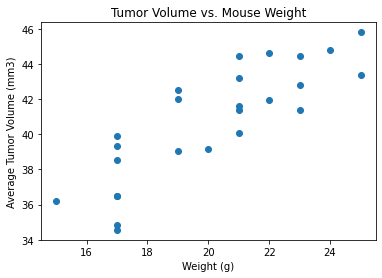

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cap_avg = capomulin_data.groupby(['Mouse ID']).mean()
cap_avg
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')

## Correlation and Regression

The correlation between weight and average tumor volume for mice treated with Capomulin is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

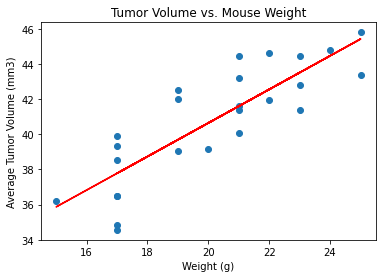

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
correlation

m = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
y_values = cap_avg['Weight (g)']*m[0]+m[1]
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')
print(f"The correlation between weight and average tumor volume for mice treated with Capomulin is {correlation}")
plt.show

# Observations and Insights